## Problem Statement: Loan Granting and Status Prediction

## Domain : Finance

### Background
Financial institutions face significant challenges in the loan granting process due to the risk of default by borrowers. Accurate prediction of loan status—whether a borrower will repay the loan or default—is crucial for minimizing financial risks and ensuring the sustainability of lending operations. Traditional methods of assessing creditworthiness often rely on historical financial data and static models, which may not fully capture the dynamic nature of borrowers' financial behavior and external economic factors.

### Problem
The main problem is the need for an advanced predictive model that can effectively assess the likelihood of loan repayment or default. This model should analyze a wide range of factors, including borrowers' credit history, employment status, income, debt-to-income ratio, and other relevant financial metrics. Additionally, the model should be capable of adapting to changing economic conditions and individual circumstances, providing accurate and timely predictions.

### Input Dataset
The dataset contains 111105 rows with 19 columns as given below:
1. Loan ID
2. Customer ID
3. Loan Status
4. Current Loan Amount
5. Term
6. Credit Score
7. Years in current job
8. Home Ownership
9. Annual Income
10. Purpose
11. Monthly Debt
12. Years of Credit History
13. Months since last delinquent
14. Number of Open Accounts
15. Number of Credit Problems
16. Current Credit Balance
17. Maximum Open Credit
18. Bankruptcies
19. Tax Liens

### Task to Perform
**Task 1: Data Load and EDA**
- Load the data and perform the data checking and exploratory data analysis.

**Task 2: Data Cleaning**
- Clean the data for any duplicates etc.

**Task 3: Data Munging**
- Treat the outliers and null values.

**Task 4: Data Visualization**
- Visualize the important parameters of the data to gain in-depth insights.

**Task 5: Machine Learning**
- Build models by comparing different algorithms and prepare the final result.

### Expected Outcomes
- **Enhanced Decision-Making:** Improved loan approval processes through accurate and data-driven predictions, leading to better financial outcomes for both lenders and borrowers.
- **Reduced Default Rates:** Lower rates of loan defaults due to more precise risk assessment and management.
- **Customer Satisfaction:** Increased borrower satisfaction through fair and transparent loan granting procedures.

### Conclusion
Addressing the challenge of predicting loan repayment status with a sophisticated predictive model will enable financial institutions to make better-informed lending decisions. This will not only mitigate financial risks but also contribute to the overall stability and growth of the financial sector.

<br>
<br>
<br>
<br>
<br>



## Importing Libraries

In [302]:
import warnings

warnings.filterwarnings("ignore")

In [303]:
import os
import numpy as np
import pandas as pd

In [304]:
import matplotlib.pyplot as plt
import seaborn as sns

In [305]:
from sklearn.preprocessing import binarize
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures

In [306]:
from sklearn.model_selection import train_test_split, cross_val_score

In [307]:
from sklearn.model_selection import GridSearchCV

In [308]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [309]:
from sklearn.metrics import roc_auc_score, log_loss, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, recall_score, precision_score

In [310]:
from sklearn.calibration import calibration_curve

## Step 1:
## Data Loading and EDA

In [311]:
excel_file = './Data/Loan_Granting_dataset.xlsx'

# Verify if the file exists
if not os.path.isfile(excel_file):
    print(f"Error: The file {excel_file} does not exist. Please check the file path.")
else:
    # Create a Data folder if it doesn't exist
    output_folder = 'Data'
    os.makedirs(output_folder, exist_ok=True)

    # Convert each sheet in the Excel file to a CSV
    excel_data = pd.read_excel(excel_file, sheet_name=None)

    for sheet_name, data in excel_data.items():
        csv_file = os.path.join(output_folder, f'{sheet_name}.csv')
        data.to_csv(csv_file, index=False)
        print(f'Successfully converted {sheet_name} to {csv_file}')

Successfully converted Loan_Granting_dataset.csv to Data\Loan_Granting_dataset.csv.csv


In [312]:
filepath = "Data\Loan_Granting_dataset.csv.csv"

# Load the data
df = pd.read_csv(filepath)

In [313]:
df.shape

(111105, 19)

In [314]:
df.head()

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Years_in_current_job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Charged Off,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111105 entries, 0 to 111104
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan_ID                       111105 non-null  object 
 1   Customer_ID                   111105 non-null  object 
 2   Loan_Status                   111105 non-null  object 
 3   Current_Loan_Amount           111105 non-null  int64  
 4   Term                          111105 non-null  object 
 5   Credit_Score                  89768 non-null   float64
 6   Years_in_current_job          106412 non-null  object 
 7   Home_Ownership                111105 non-null  object 
 8   Annual_Income                 89768 non-null   float64
 9   Purpose                       111105 non-null  object 
 10  Monthly_Debt                  111105 non-null  float64
 11  Years_of_Credit_History       111105 non-null  float64
 12  Months_since_last_delinquent  52102 non-null

In [316]:
df = df.sample(71111)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71111 entries, 5900 to 73786
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan_ID                       71111 non-null  object 
 1   Customer_ID                   71111 non-null  object 
 2   Loan_Status                   71111 non-null  object 
 3   Current_Loan_Amount           71111 non-null  int64  
 4   Term                          71111 non-null  object 
 5   Credit_Score                  57449 non-null  float64
 6   Years_in_current_job          68142 non-null  object 
 7   Home_Ownership                71111 non-null  object 
 8   Annual_Income                 57449 non-null  float64
 9   Purpose                       71111 non-null  object 
 10  Monthly_Debt                  71111 non-null  float64
 11  Years_of_Credit_History       71111 non-null  float64
 12  Months_since_last_delinquent  33485 non-null  float64
 13  Num

In [317]:
df.dtypes

Loan_ID                          object
Customer_ID                      object
Loan_Status                      object
Current_Loan_Amount               int64
Term                             object
Credit_Score                    float64
Years_in_current_job             object
Home_Ownership                   object
Annual_Income                   float64
Purpose                          object
Monthly_Debt                    float64
Years_of_Credit_History         float64
Months_since_last_delinquent    float64
Number_of_Open_Accounts           int64
Number_of_Credit_Problems         int64
Current_Credit_Balance            int64
Maximum_Open_Credit               int64
Bankruptcies                    float64
Tax_Liens                       float64
dtype: object

In [318]:
numeric_cols = []
catagorical_cols = []

for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        numeric_cols.append(col)
    else:
        catagorical_cols.append(col)

print(f"Total Columns   :   {df.shape[1]}")
print(f"Total Numeric columns   :   {len(numeric_cols)}")
print(f"Total Categorical columns   :   {len(catagorical_cols)}")

Total Columns   :   19
Total Numeric columns   :   12
Total Categorical columns   :   7


In [319]:
df.describe()

,Current_Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
count,7.111100e+04,57449.000000,5.744900e+04,71111.000000,71111.000000,33485.000000,71111.000000,71111.000000,7.111100e+04,7.111100e+04,70967.000000,71105.000000
mean,1.148761e+07,1077.860067,7.238842e+04,972.179774,18.191470,34.951740,11.134241,0.167625,1.556411e+04,3.408838e+04,0.117393,0.029168
std,3.186771e+07,1478.635288,5.908099e+04,641.472959,7.030888,21.957284,5.015076,0.481932,2.035217e+04,3.481173e+05,0.351039,0.254944
min,4.910000e+02,585.000000,4.268000e+03,0.000000,3.700000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.184500e+03,705.000000,4.466500e+04,541.315000,13.500000,16.000000,8.000000,0.000000,5.922500e+03,1.246100e+04,0.000000,0.000000
50%,1.423000e+04,724.000000,6.177700e+04,851.810000,16.900000,32.000000,10.000000,0.000000,1.104500e+04,2.132200e+04,0.000000,0.000000
75%,2.385000e+04,741.000000,8.685300e+04,1263.360000,21.700000,51.000000,14.000000,0.000000,1.936700e+04,3.563100e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,22939.120000,70.500000,148.000000,76.000000,12.000000,1.730472e+06,5.930574e+07,6.000000,11.000000


Based upon above information we can say that 25% of the credit score values is 705 and median, i.e., 50% percentile is 724 so 25% percentile of data values is less than 705 and 75% of the object value is lesst than 741 so most of the data points are spread between 700 to 750, the other values may be very low and high that we can ignore so the next step we will ignore or convert to null value that have credit score more than 850 or less than 300.

In [320]:
df.loc[((df['Credit_Score'] > 850) & 
        (df['Credit_Score'] < 300)), 'Credit_Score'] = np.nan

Count the number of NA values for each variable

In [321]:
df.isnull().sum().sum()

68069

In [322]:
df.isnull().sum()

Loan_ID                             0
Customer_ID                         0
Loan_Status                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                    13662
Years_in_current_job             2969
Home_Ownership                      0
Annual_Income                   13662
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    37626
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 0
Bankruptcies                      144
Tax_Liens                           6
dtype: int64

Number of examples per class

In [323]:
df.groupby('Loan_Status')['Loan_ID'].count()

Loan_Status
Charged Off    16168
Fully Paid     54943
Name: Loan_ID, dtype: int64

Now if we dicuss about the load ID it might happen that we may have duplicates in records. We may have duplicate rows with same load ID. Lets we analyse it more clearly here by using group by

In [324]:
loanIDCount = df.groupby("Loan_ID")['Loan_Status'].count()
loanIDCount = loanIDCount.sort_values(ascending=False)

loanIDCount.head(10)

Loan_ID
ffffe32e-ed17-459f-9cfd-7b9ee7972933    2
a5998051-73b8-4b37-97a2-1c591b9c63aa    2
2bbcaca2-d53d-46e3-9b91-83cda8cca5a8    2
a53acb00-1334-4cd7-a085-fa85227246a0    2
69d7fe10-4ad8-440a-b9a5-6dd764bf4c20    2
da53262d-220c-4268-aa50-f82e8ce61552    2
2bc20dab-9292-48c5-9c4a-ae3bd1240d8f    2
da503707-5829-44d8-995d-77019d321320    2
a53d6331-d6a9-4986-b284-08c49abf8303    2
69d1b073-34ba-4691-ac05-45605ccbefbf    2
Name: Loan_Status, dtype: int64

Checking for duplicate Loan_ID

In [325]:
df[df['Loan_ID'] == 'b063fafe-04d2-4005-85d6-91c0998c4ddc']

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Years_in_current_job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
81590,b063fafe-04d2-4005-85d6-91c0998c4ddc,f6b8b052-5b27-4e7b-873c-bcd86c155779,Fully Paid,11876,Short Term,670.0,1 year,Rent,26439.0,Debt Consolidation,757.93,12.8,35.0,6,1,2372,7232,0.0,1.0


**We need to remove all this duplicates from the dataset**

<br>
<br>
<br>


## Step 2:
## Data Cleaning

In [326]:
df_cleaned = df.copy()

In [327]:
df_cleaned.drop_duplicates(inplace= True)

In [328]:
print(f"The shape of the original dataset   :   {df.shape}")
print(f"The shape of the dataset after removing duplicates   :   {df_cleaned.shape}")

The shape of the original dataset   :   (71111, 19)
The shape of the dataset after removing duplicates   :   (66048, 19)


As we can see 2582 duplicates rows has been removed

In [329]:
loanIDCount = df_cleaned.groupby("Loan_ID")['Loan_Status'].count()
loanIDCount = loanIDCount.sort_values(ascending=False)

loanIDCount.head(10)

Loan_ID
8420f4e1-1fe7-4e27-bbef-7dba88f61a10    2
209f2db8-0580-4737-9050-4d6f54a7c981    2
20cccc14-9c50-46cf-ba6a-981baa5dfe06    2
9f20a053-6c0c-4bef-abfe-9518b4551ca0    2
e0c5332a-0631-48d8-9351-f81273d9ee15    2
e0cff8c8-faa9-4c82-8ad7-f66a35ca6b7d    2
9f0e86ad-d3bc-47c0-bf9b-2c7ca255015e    2
6701f48f-ac05-461a-b5ae-a97d842cd3cc    2
e0dc2e44-c709-44ca-9b6b-b84a7fe3a410    2
9f02142a-4b8b-4e70-963f-4eb6d84a3379    2
Name: Loan_Status, dtype: int64

In [330]:
df_cleaned[df_cleaned['Loan_ID'] == '7b155b9d-fd42-477e-a31e-62d83d12195']

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Years_in_current_job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens


Now we have those columns were row values are different and we have to tream them differently. In this step we will store if there is any null value in any rows in naCount column

In [331]:
df_cleaned['NaNcount'] = df_cleaned.isnull().sum(axis=1)

In [332]:
df_cleaned.head()

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Years_in_current_job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,NaNcount
5900,813cdceb-08b0-4045-88f4-02f330df7e22,3afc9e72-cbc9-4eea-b11e-a07a44233336,Fully Paid,99999999,Short Term,713.0,6 years,Rent,178038.0,Debt Consolidation,1474.75,16.4,72.0,11,1,5678,13553,1.0,0.0,0
6652,561d1a31-a32c-4a81-a3b1-e5daa0fb4a69,a788f60b-9d48-4e7f-9b89-d393f58551f3,Fully Paid,99999999,Short Term,737.0,4 years,Home Mortgage,122313.0,Debt Consolidation,1793.91,26.9,NaN,14,0,44309,68063,0.0,0.0,1
60620,1deeec57-e49c-4208-8709-b40da9b4f1a4,77086dd0-8a7a-44af-ae25-bd82c578cddd,Fully Paid,7910,Short Term,730.0,2 years,Rent,54379.0,Debt Consolidation,223.86,9.8,NaN,4,0,7976,9786,0.0,0.0,1
100832,09800384-e70c-4fc4-9102-ee6d3fbb8861,87c4e24e-7dc5-44a6-a054-8feafff04c68,Fully Paid,4048,Short Term,679.0,3 years,Rent,24288.0,Debt Consolidation,195.32,30.0,51.0,5,0,6253,9460,0.0,0.0,0
5394,80eb057e-c326-42db-97e8-9d43c957cbc0,677f5ee5-1ab5-44c9-bb84-77e3c9c07c5e,Fully Paid,99999999,Long Term,726.0,2 years,Rent,149475.0,Debt Consolidation,987.78,13.5,22.0,23,0,13800,24598,0.0,0.0,0


Sort the data by NaNcount and Loan_ID column  

In [333]:
df_cleaned.sort_values(by=['Loan_ID', 'NaNcount'], inplace=True)

df_cleaned.head()

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Years_in_current_job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,NaNcount
49725,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,355.18,11.5,NaN,12,0,17391,37081,0.0,0.0,1
15639,00020fb0-6b8a-4b3a-8c72-9c4c847e8cb6,c9decd06-16f7-44c3-b007-8776f2a9233d,Fully Paid,99999999,Short Term,742.0,3 years,Home Mortgage,64760.0,Debt Consolidation,582.84,26.8,NaN,11,0,8880,22711,0.0,0.0,1
97429,0004f37b-5859-40f6-98d0-367aa3b3f3f1,f662b062-5fa5-463d-b5c0-4e36d09fcab1,Fully Paid,13719,Short Term,724.0,1 year,Own Home,34297.0,Home Improvements,777.38,13.6,2.0,12,0,6720,53335,0.0,0.0,0
32051,0004f37b-5859-40f6-98d0-367aa3b3f3f1,f662b062-5fa5-463d-b5c0-4e36d09fcab1,Fully Paid,13719,Short Term,NaN,1 year,Own Home,NaN,Home Improvements,777.38,13.6,2.0,12,0,6720,53335,0.0,0.0,2
97050,000582b2-2b2e-4290-9360-43e3a93b57c2,bafabc36-a32f-489c-9531-896ff66c9171,Fully Paid,16080,Long Term,692.0,10+ years,Rent,63315.0,Debt Consolidation,321.85,13.8,NaN,10,0,9126,13662,0.0,0.0,1


lets drop all the duplicate loan ID, by keeping the first occurance 

In [334]:
df_cleaned.drop_duplicates(subset=['Loan_ID'], keep= 'first', inplace=True)

In [335]:
df_cleaned.shape

(62052, 20)

**Now the dataset should have all unique values**

In [336]:
loanIDCount = df_cleaned.groupby("Loan_ID")['Loan_Status'].count()

loanIDCount = loanIDCount.sort_values(ascending=False)

loanIDCount.head(5)

Loan_ID
0000757f-a121-41ed-b17b-162e76647c1f    1
aa78e233-7c72-447d-8151-d5f21d3c153a    1
aa610268-b38d-4366-ba47-26540bfd89f0    1
aa62294f-e958-4025-9883-c58f7e1744b2    1
aa624cbf-50dd-4571-84a0-94a1ba1c2d10    1
Name: Loan_Status, dtype: int64

In [337]:
print(len(df_cleaned['Loan_ID'].unique()))

print(df_cleaned.shape)

62052
(62052, 20)


In [338]:
print(f"Total null count in the dataset     :   {df_cleaned.isnull().sum().sum()}")

Total null count in the dataset     :   59100


In [339]:
for col in df_cleaned.columns:

    if df_cleaned[col].isnull().sum() > 0:
        print(f"{col}     :    {df_cleaned[col].isnull().sum()}")

Credit_Score     :    11481
Years_in_current_job     :    2606
Annual_Income     :    11481
Months_since_last_delinquent     :    33396
Bankruptcies     :    130
Tax_Liens     :    6


In [340]:
df_cleaned.describe()

,Current_Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,NaNcount
count,6.205200e+04,50571.000000,5.057100e+04,62052.000000,62052.000000,28656.000000,62052.000000,62052.000000,6.205200e+04,6.205200e+04,61922.000000,62046.000000,62052.000000
mean,1.171713e+07,1129.254850,7.232717e+04,966.861725,18.257284,35.067700,11.128956,0.163750,1.552574e+04,3.487564e+04,0.114224,0.028866,0.952427
std,3.214336e+07,1568.943371,6.043774e+04,639.126170,7.052039,21.964732,4.996590,0.475693,2.034851e+04,3.698123e+05,0.345350,0.253886,0.953205
min,4.910000e+02,585.000000,4.268000e+03,0.000000,3.700000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,8.165000e+03,708.000000,4.466750e+04,537.587500,13.500000,16.000000,8.000000,0.000000,5.949000e+03,1.266775e+04,0.000000,0.000000,0.000000
50%,1.409800e+04,728.000000,6.175000e+04,846.415000,17.000000,32.000000,10.000000,0.000000,1.105900e+04,2.165300e+04,0.000000,0.000000,1.000000
75%,2.368300e+04,742.000000,8.681100e+04,1256.172500,21.700000,51.000000,14.000000,0.000000,1.931750e+04,3.605900e+04,0.000000,0.000000,1.000000
max,1.000000e+08,7510.000000,8.713547e+06,22939.120000,70.500000,148.000000,76.000000,12.000000,1.730472e+06,5.930574e+07,6.000000,11.000000,5.000000


In [341]:
df_cleaned.dtypes

Loan_ID                          object
Customer_ID                      object
Loan_Status                      object
Current_Loan_Amount               int64
Term                             object
Credit_Score                    float64
Years_in_current_job             object
Home_Ownership                   object
Annual_Income                   float64
Purpose                          object
Monthly_Debt                    float64
Years_of_Credit_History         float64
Months_since_last_delinquent    float64
Number_of_Open_Accounts           int64
Number_of_Credit_Problems         int64
Current_Credit_Balance            int64
Maximum_Open_Credit               int64
Bankruptcies                    float64
Tax_Liens                       float64
NaNcount                          int64
dtype: object

In [342]:
yearsInCurrentJobCount = df_cleaned.groupby("Years_in_current_job")['Loan_ID'].count()

yearsInCurrentJobCount = yearsInCurrentJobCount.sort_values(ascending=False)

yearsInCurrentJobCount

Years_in_current_job
10+ years    19213
2 years       5668
< 1 year      5112
3 years       5078
5 years       4266
1 year        4057
4 years       3838
6 years       3503
7 years       3394
8 years       2904
9 years       2413
Name: Loan_ID, dtype: int64

Rounding off the Years_in_current_job column

In [343]:
# df_cleaned.loc[(df_cleaned['Years_in_current_job'] == '< 1 year'), 'Years_in_current_job'] = 0.5
# df_cleaned.loc[(df_cleaned['Years_in_current_job'] == '1 year'), 'Years_in_current_job'] = 1
# df_cleaned.loc[(df_cleaned['Years_in_current_job'] == '2 year'), 'Years_in_current_job'] = 2
# df_cleaned.loc[(df_cleaned['Years_in_current_job'] == '3 year'), 'Years_in_current_job'] = 3
# df_cleaned.loc[(df_cleaned['Years_in_current_job'] == '4 year'), 'Years_in_current_job'] = 4
# df_cleaned.loc[(df_cleaned['Years_in_current_job'] == '5 year'), 'Years_in_current_job'] = 5
# df_cleaned.loc[(df_cleaned['Years_in_current_job'] == '6 year'), 'Years_in_current_job'] = 6
# df_cleaned.loc[(df_cleaned['Years_in_current_job'] == '7 year'), 'Years_in_current_job'] = 7
# df_cleaned.loc[(df_cleaned['Years_in_current_job'] == '8 year'), 'Years_in_current_job'] = 8
# df_cleaned.loc[(df_cleaned['Years_in_current_job'] == '9 year'), 'Years_in_current_job'] = 9
# df_cleaned.loc[(df_cleaned['Years_in_current_job'] == '10+ year'), 'Years_in_current_job'] = 10

In [344]:
years_mapping = {
    '< 1 year': 0.5,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}

df_cleaned['Years_in_current_job'] = df_cleaned['Years_in_current_job'].map(years_mapping)

In [345]:
df_cleaned.head()

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Years_in_current_job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,NaNcount
49725,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4.0,Rent,50025.0,Debt Consolidation,355.18,11.5,NaN,12,0,17391,37081,0.0,0.0,1
15639,00020fb0-6b8a-4b3a-8c72-9c4c847e8cb6,c9decd06-16f7-44c3-b007-8776f2a9233d,Fully Paid,99999999,Short Term,742.0,3.0,Home Mortgage,64760.0,Debt Consolidation,582.84,26.8,NaN,11,0,8880,22711,0.0,0.0,1
97429,0004f37b-5859-40f6-98d0-367aa3b3f3f1,f662b062-5fa5-463d-b5c0-4e36d09fcab1,Fully Paid,13719,Short Term,724.0,1.0,Own Home,34297.0,Home Improvements,777.38,13.6,2.0,12,0,6720,53335,0.0,0.0,0
97050,000582b2-2b2e-4290-9360-43e3a93b57c2,bafabc36-a32f-489c-9531-896ff66c9171,Fully Paid,16080,Long Term,692.0,10.0,Rent,63315.0,Debt Consolidation,321.85,13.8,NaN,10,0,9126,13662,0.0,0.0,1
97876,00069ff1-a877-4d35-81be-7cd359b99956,ee3c27f2-766a-499c-9a96-d17c4d2faa16,Fully Paid,1433,Short Term,716.0,10.0,Home Mortgage,108735.0,Home Improvements,2627.76,15.1,5.0,22,0,27706,49563,0.0,0.0,0


In [346]:
df_cleaned['Years_in_current_job'] = df_cleaned["Years_in_current_job"].astype('float64')

In [347]:
monthlyDebtCount = df_cleaned.groupby("Monthly_Debt")['Loan_ID'].count()

monthlyDebtCount = monthlyDebtCount.sort_values(ascending=False)

monthlyDebtCount

Monthly_Debt
0.00        51
775.08       6
701.93       5
761.33       5
795.18       5
            ..
689.42       1
689.47       1
689.55       1
689.56       1
22939.12     1
Name: Loan_ID, Length: 52309, dtype: int64

In [348]:
df_cleaned['Monthly_Debt'].dtypes

dtype('float64')

Convert number strings with commas to float

In [349]:
df_cleaned['Monthly_Debt'] = df_cleaned['Monthly_Debt'].astype(str)

df_cleaned['Monthly_Debt'] = df_cleaned['Monthly_Debt'].str.replace(",", "").astype('float64')

df_cleaned['Monthly_Debt'] = df_cleaned['Monthly_Debt'].astype('float64')

In [350]:
df_cleaned.dtypes

Loan_ID                          object
Customer_ID                      object
Loan_Status                      object
Current_Loan_Amount               int64
Term                             object
Credit_Score                    float64
Years_in_current_job            float64
Home_Ownership                   object
Annual_Income                   float64
Purpose                          object
Monthly_Debt                    float64
Years_of_Credit_History         float64
Months_since_last_delinquent    float64
Number_of_Open_Accounts           int64
Number_of_Credit_Problems         int64
Current_Credit_Balance            int64
Maximum_Open_Credit               int64
Bankruptcies                    float64
Tax_Liens                       float64
NaNcount                          int64
dtype: object

In [351]:
df_cleaned.to_csv('./Data/Loan_Granting_dataset_cleaned.csv', index=False)

## Step 3:
## Data Munging

In [352]:
df_munged = pd.read_csv('./Data/Loan_Granting_dataset_cleaned.csv')

In [353]:
df_munged.shape

(62052, 20)

In [354]:
df_munged.dtypes

Loan_ID                          object
Customer_ID                      object
Loan_Status                      object
Current_Loan_Amount               int64
Term                             object
Credit_Score                    float64
Years_in_current_job            float64
Home_Ownership                   object
Annual_Income                   float64
Purpose                          object
Monthly_Debt                    float64
Years_of_Credit_History         float64
Months_since_last_delinquent    float64
Number_of_Open_Accounts           int64
Number_of_Credit_Problems         int64
Current_Credit_Balance            int64
Maximum_Open_Credit               int64
Bankruptcies                    float64
Tax_Liens                       float64
NaNcount                          int64
dtype: object

In [355]:
df_munged.isnull().sum()

Loan_ID                             0
Customer_ID                         0
Loan_Status                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                    11481
Years_in_current_job             2606
Home_Ownership                      0
Annual_Income                   11481
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    33396
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 0
Bankruptcies                      130
Tax_Liens                           6
NaNcount                            0
dtype: int64

In [356]:
null_cols = []

for col in df_munged.columns:
    if df_munged[col].isnull().sum() > 0:
        null_cols.append(col)

In [357]:
print(f"Total null columns  :   {len(null_cols)}")
null_cols

Total null columns  :   6


['Credit_Score',
 'Years_in_current_job',
 'Annual_Income',
 'Months_since_last_delinquent',
 'Bankruptcies',
 'Tax_Liens']

Fill in missing values with mean

In [358]:
for col in null_cols:
    df_munged.loc[df_munged[col].isnull(), col] = df_munged[col].mean()

In [359]:
df_munged.isnull().sum()

Loan_ID                         0
Customer_ID                     0
Loan_Status                     0
Current_Loan_Amount             0
Term                            0
Credit_Score                    0
Years_in_current_job            0
Home_Ownership                  0
Annual_Income                   0
Purpose                         0
Monthly_Debt                    0
Years_of_Credit_History         0
Months_since_last_delinquent    0
Number_of_Open_Accounts         0
Number_of_Credit_Problems       0
Current_Credit_Balance          0
Maximum_Open_Credit             0
Bankruptcies                    0
Tax_Liens                       0
NaNcount                        0
dtype: int64

In [360]:
df_munged.drop('NaNcount', axis=1, inplace=True)

*Now there's no null values in the dataset*

In [361]:
cols = df_munged.columns

qtyFeatures = []
catFeatures = []

for col in cols:
    if df_munged[col].dtypes in ['int64', 'float64']:
        qtyFeatures.append(col)
    elif df_munged[col].dtypes == 'object':
        catFeatures.append(col)


In [362]:

print(f"Quantity features : {len(qtyFeatures)}")
print(f"Categorical features : {len(catFeatures)}")


Quantity features : 13
Categorical features : 6


In [363]:
feat_to_remove = ['Loan_ID', 'Customer_ID', 'Loan_Status']

for feat in feat_to_remove:
    if feat in catFeatures:
        catFeatures.remove(feat)

In [364]:
print(f"Quantity features : {len(qtyFeatures)}")
print(f"Categorical features : {len(catFeatures)}")

Quantity features : 13
Categorical features : 3


In [365]:
qtyFeatures

['Current_Loan_Amount',
 'Credit_Score',
 'Years_in_current_job',
 'Annual_Income',
 'Monthly_Debt',
 'Years_of_Credit_History',
 'Months_since_last_delinquent',
 'Number_of_Open_Accounts',
 'Number_of_Credit_Problems',
 'Current_Credit_Balance',
 'Maximum_Open_Credit',
 'Bankruptcies',
 'Tax_Liens']

In [366]:
catFeatures

['Term', 'Home_Ownership', 'Purpose']

In [367]:
label = 'Loan_Status'

In [368]:
df_munged.groupby(['Home_Ownership'])['Loan_ID'].count()

Home_Ownership
HaveMortgage       126
Home Mortgage    30085
Own Home          5723
Rent             26118
Name: Loan_ID, dtype: int64

In [369]:
df_munged.loc[(df_munged['Home_Ownership'] == 'HaveMortgage'), 'Home_Ownership'] = 'Home Mortgage'

In [370]:
df_munged.groupby(['Home_Ownership'])['Loan_ID'].count()

Home_Ownership
Home Mortgage    30211
Own Home          5723
Rent             26118
Name: Loan_ID, dtype: int64

In [371]:
df_munged.groupby(['Term'])['Loan_ID'].count()

Term
Long Term     16130
Short Term    45922
Name: Loan_ID, dtype: int64

In [372]:
df_munged.groupby(['Purpose'])['Loan_ID'].count()

Purpose
Business Loan             946
Buy House                 422
Buy a Car                 826
Debt Consolidation      48950
Educational Expenses       60
Home Improvements        3651
Medical Bills             670
Other                    2001
Take a Trip               333
major_purchase            242
moving                     94
other                    3554
renewable_energy            7
small_business            182
vacation                   55
wedding                    59
Name: Loan_ID, dtype: int64

In [373]:
df_munged.loc[(df_munged['Purpose'] == 'other'), 'Purpose'] = 'Other'

In [374]:
df_munged.groupby(['Purpose'])['Loan_ID'].count()

Purpose
Business Loan             946
Buy House                 422
Buy a Car                 826
Debt Consolidation      48950
Educational Expenses       60
Home Improvements        3651
Medical Bills             670
Other                    5555
Take a Trip               333
major_purchase            242
moving                     94
renewable_energy            7
small_business            182
vacation                   55
wedding                    59
Name: Loan_ID, dtype: int64

In [375]:
df_munged['Loan_Status'].value_counts()

Loan_Status
Fully Paid     45884
Charged Off    16168
Name: count, dtype: int64

In [376]:
df_munged.to_csv("./Data/Loan_Granting_dataset_munged.csv")

## Step 4:
## Data Encoding and Visualization

In [377]:
dataset = pd.read_csv('./Data/Loan_Granting_dataset_munged.csv')

In [378]:
dataset.shape

(62052, 20)

In [379]:
dataset.columns

Index(['Unnamed: 0', 'Loan_ID', 'Customer_ID', 'Loan_Status',
       'Current_Loan_Amount', 'Term', 'Credit_Score', 'Years_in_current_job',
       'Home_Ownership', 'Annual_Income', 'Purpose', 'Monthly_Debt',
       'Years_of_Credit_History', 'Months_since_last_delinquent',
       'Number_of_Open_Accounts', 'Number_of_Credit_Problems',
       'Current_Credit_Balance', 'Maximum_Open_Credit', 'Bankruptcies',
       'Tax_Liens'],
      dtype='object')

In [380]:
dataset.drop(['Unnamed: 0', 'Loan_ID', 'Customer_ID'], axis=1, inplace=True)

In [381]:
dataset.shape

(62052, 17)

In [382]:
dataset.head()

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Years_in_current_job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,Fully Paid,11731,Short Term,746.0,4.0,Rent,50025.0,Debt Consolidation,355.18,11.5,35.0677,12,0,17391,37081,0.0,0.0
1,Fully Paid,99999999,Short Term,742.0,3.0,Home Mortgage,64760.0,Debt Consolidation,582.84,26.8,35.0677,11,0,8880,22711,0.0,0.0
2,Fully Paid,13719,Short Term,724.0,1.0,Own Home,34297.0,Home Improvements,777.38,13.6,2.0000,12,0,6720,53335,0.0,0.0
3,Fully Paid,16080,Long Term,692.0,10.0,Rent,63315.0,Debt Consolidation,321.85,13.8,35.0677,10,0,9126,13662,0.0,0.0
4,Fully Paid,1433,Short Term,716.0,10.0,Home Mortgage,108735.0,Home Improvements,2627.76,15.1,5.0000,22,0,27706,49563,0.0,0.0


In [383]:
X = dataset[qtyFeatures + catFeatures]

y = dataset[label]

In [384]:
X.shape

(62052, 16)

In [385]:
y.shape

(62052,)

In [386]:
def encode(dataset, catFeatures, qtyFeatures):
    dataset = dataset[catFeatures + qtyFeatures]

    encoded_dataset = pd.get_dummies(dataset, columns=catFeatures, drop_first=True)

    return encoded_dataset

In [387]:
X = encode(X, catFeatures, qtyFeatures)

In [388]:
X.shape

(62052, 30)

In [389]:
X.dtypes

Current_Loan_Amount               int64
Credit_Score                    float64
Years_in_current_job            float64
Annual_Income                   float64
Monthly_Debt                    float64
Years_of_Credit_History         float64
Months_since_last_delinquent    float64
Number_of_Open_Accounts           int64
Number_of_Credit_Problems         int64
Current_Credit_Balance            int64
Maximum_Open_Credit               int64
Bankruptcies                    float64
Tax_Liens                       float64
Term_Short Term                    bool
Home_Ownership_Own Home            bool
Home_Ownership_Rent                bool
Purpose_Buy House                  bool
Purpose_Buy a Car                  bool
Purpose_Debt Consolidation         bool
Purpose_Educational Expenses       bool
Purpose_Home Improvements          bool
Purpose_Medical Bills              bool
Purpose_Other                      bool
Purpose_Take a Trip                bool
Purpose_major_purchase             bool


In [390]:
boolFeatures = []
for col in X.columns:
    if X[col].dtypes == 'bool':
        boolFeatures.append(col)


In [391]:
print(f"Total number of boolean columns are :   {len(boolFeatures)}")

Total number of boolean columns are :   17


In [392]:
X[boolFeatures] = X[boolFeatures].astype('int64')

In [393]:
X.dtypes

Current_Loan_Amount               int64
Credit_Score                    float64
Years_in_current_job            float64
Annual_Income                   float64
Monthly_Debt                    float64
Years_of_Credit_History         float64
Months_since_last_delinquent    float64
Number_of_Open_Accounts           int64
Number_of_Credit_Problems         int64
Current_Credit_Balance            int64
Maximum_Open_Credit               int64
Bankruptcies                    float64
Tax_Liens                       float64
Term_Short Term                   int64
Home_Ownership_Own Home           int64
Home_Ownership_Rent               int64
Purpose_Buy House                 int64
Purpose_Buy a Car                 int64
Purpose_Debt Consolidation        int64
Purpose_Educational Expenses      int64
Purpose_Home Improvements         int64
Purpose_Medical Bills             int64
Purpose_Other                     int64
Purpose_Take a Trip               int64
Purpose_major_purchase            int64


In [394]:
LE = LabelEncoder()

y = LE.fit_transform(y)

In [395]:
X.head()

,Current_Loan_Amount,Credit_Score,Years_in_current_job,Annual_Income,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,...,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,11731,746.0,4.0,50025.0,355.18,11.5,35.0677,12,0,17391,...,0,0,0,0,0,0,0,0,0,0
1,99999999,742.0,3.0,64760.0,582.84,26.8,35.0677,11,0,8880,...,0,0,0,0,0,0,0,0,0,0
2,13719,724.0,1.0,34297.0,777.38,13.6,2.0000,12,0,6720,...,1,0,0,0,0,0,0,0,0,0
3,16080,692.0,10.0,63315.0,321.85,13.8,35.0677,10,0,9126,...,0,0,0,0,0,0,0,0,0,0
4,1433,716.0,10.0,108735.0,2627.76,15.1,5.0000,22,0,27706,...,1,0,0,0,0,0,0,0,0,0


In [396]:
y

array([1, 1, 1, ..., 0, 1, 1])

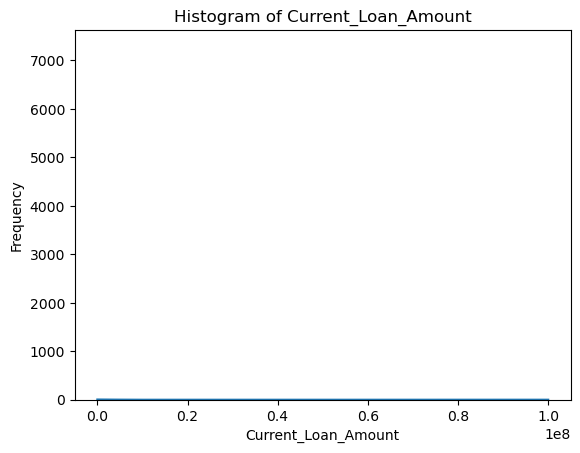

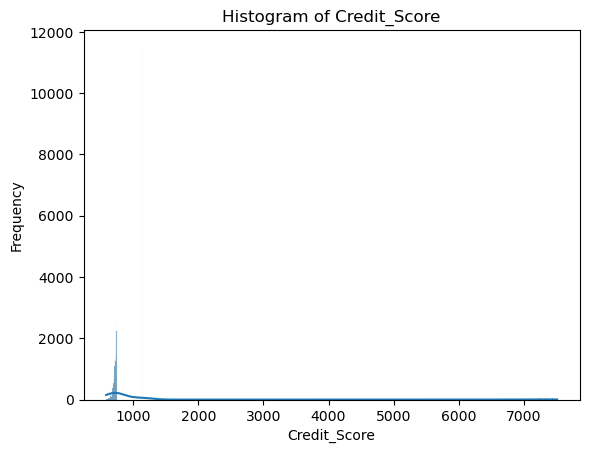

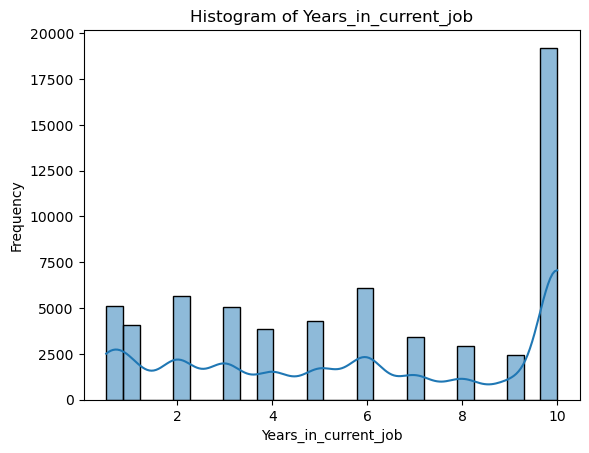

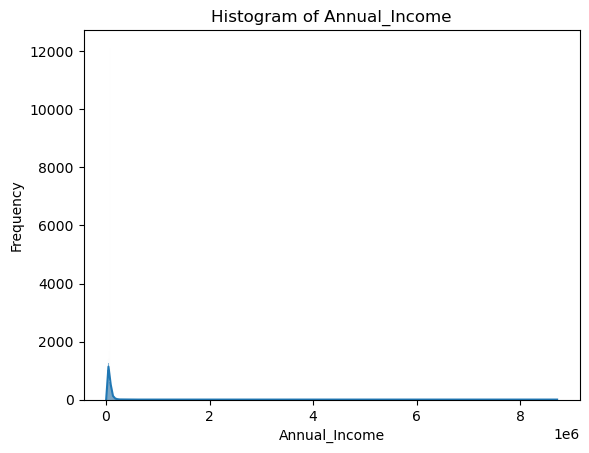

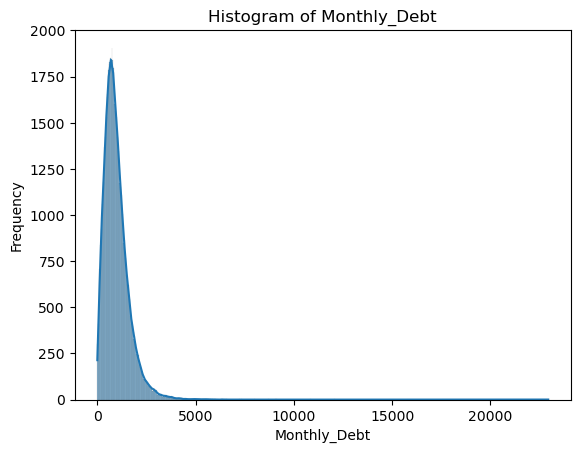

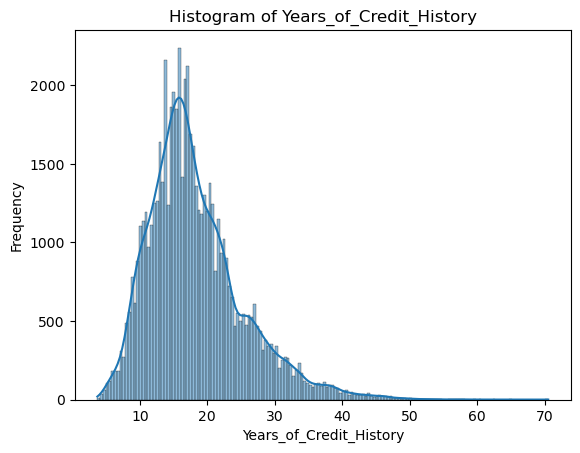

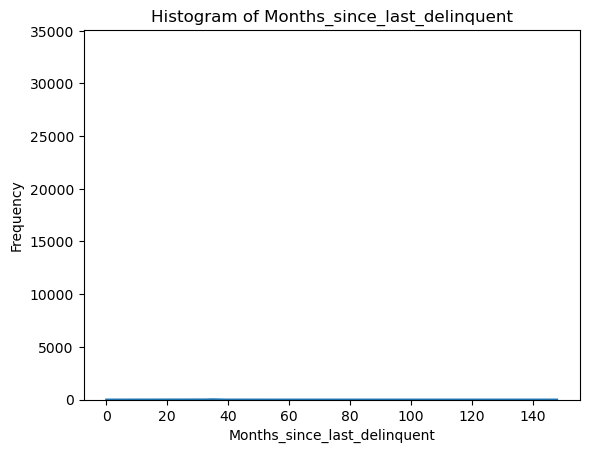

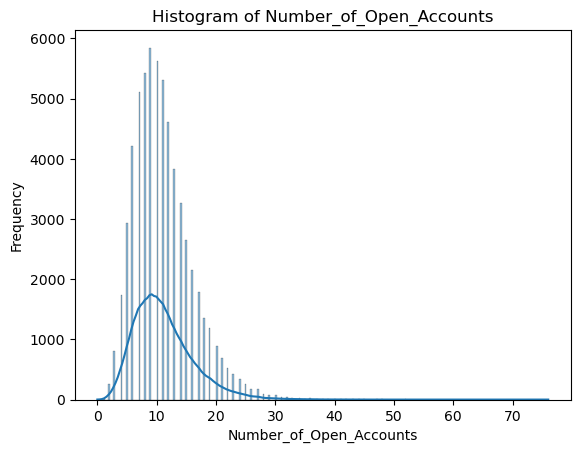

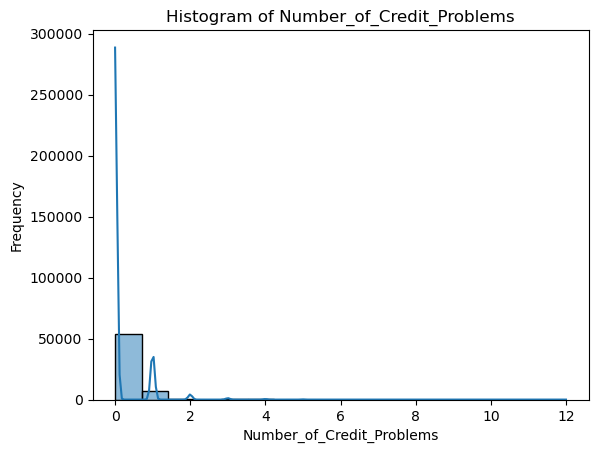

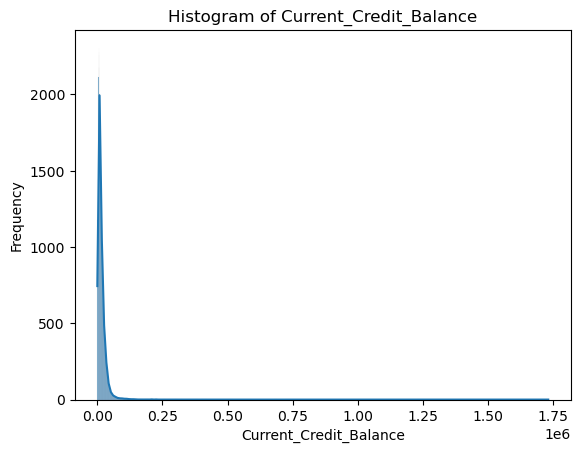

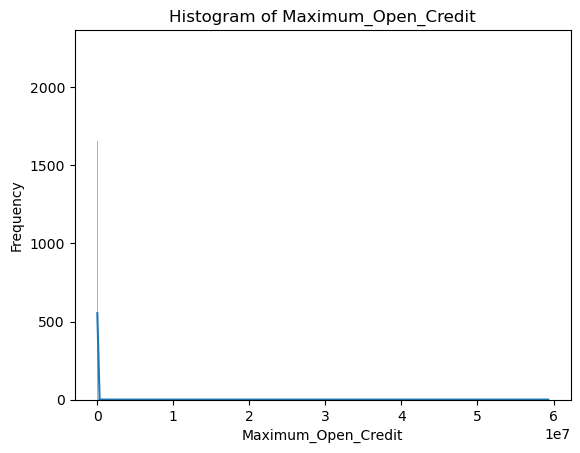

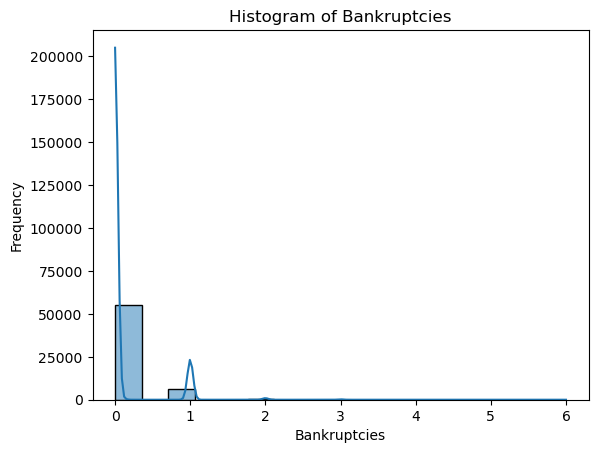

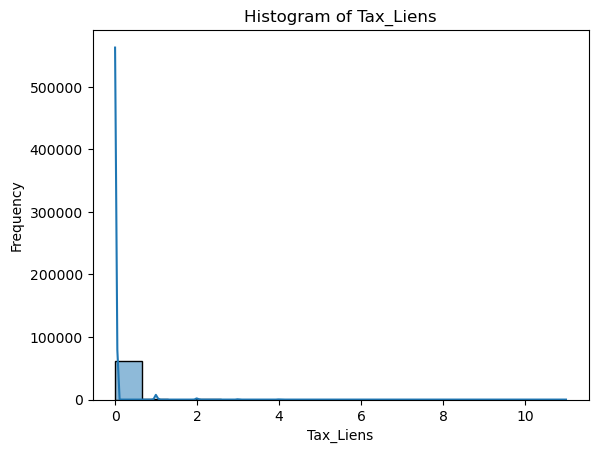

In [397]:
for col in qtyFeatures:
    plt.figure()
    sns.histplot(X[col], kde=True)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

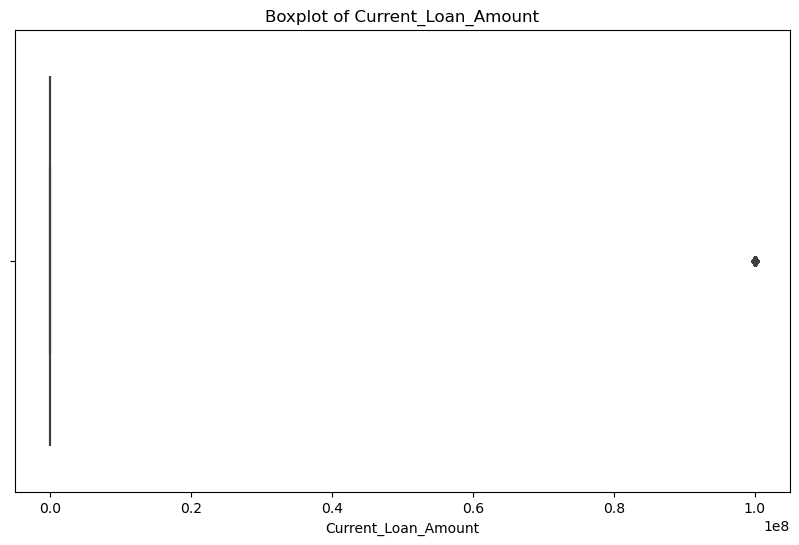

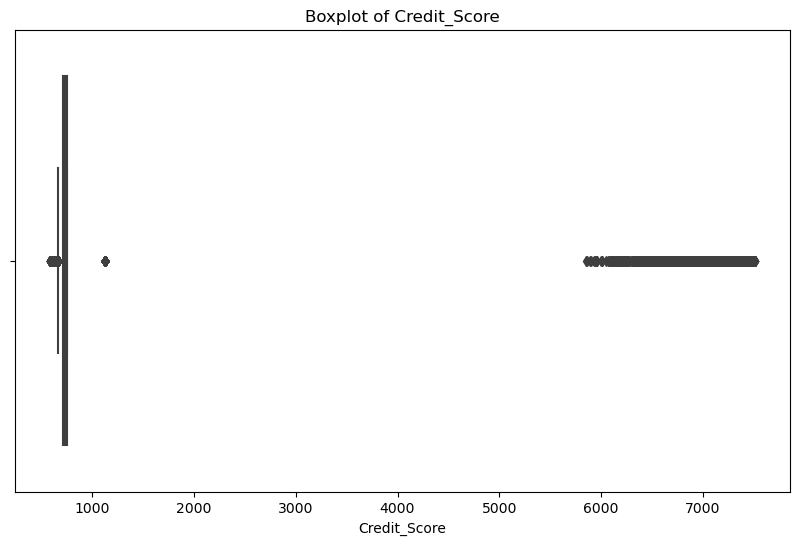

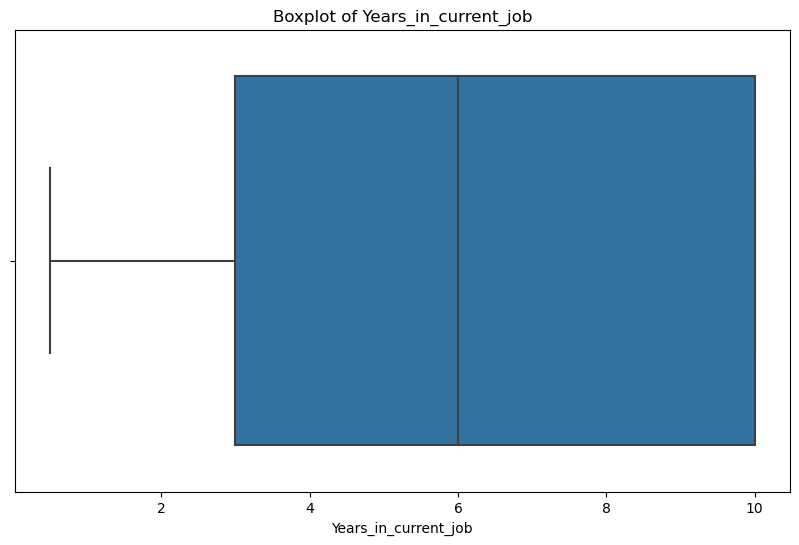

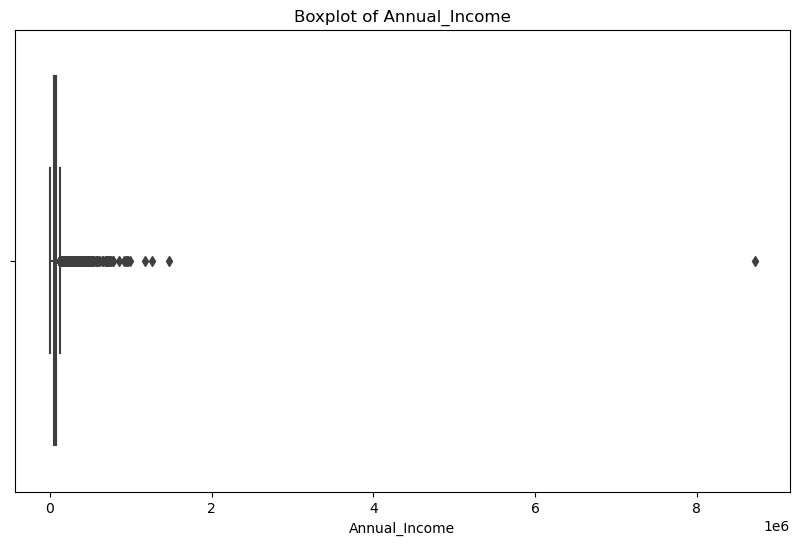

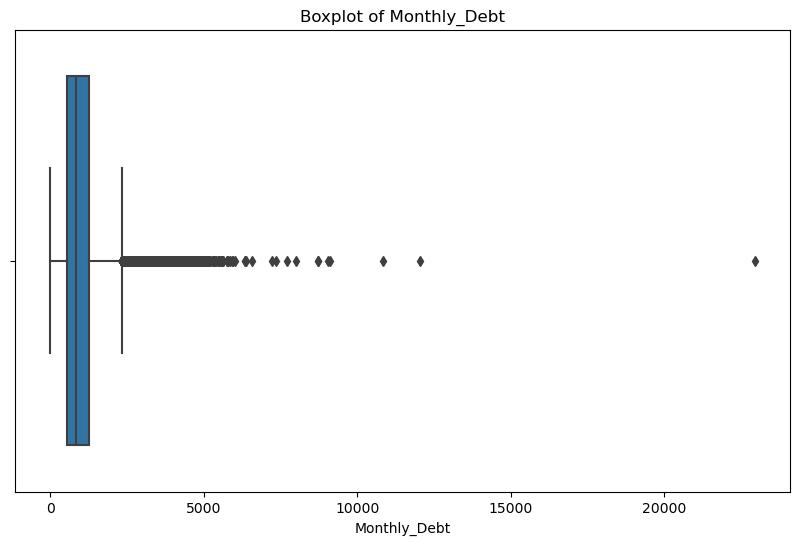

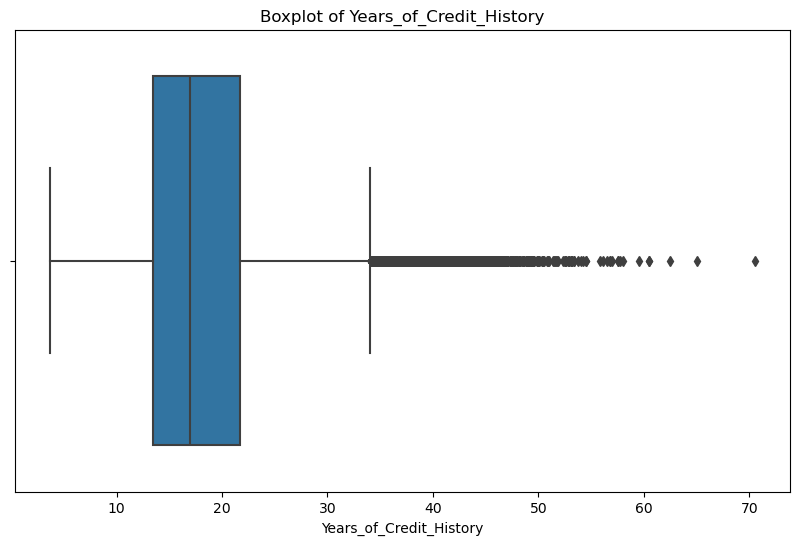

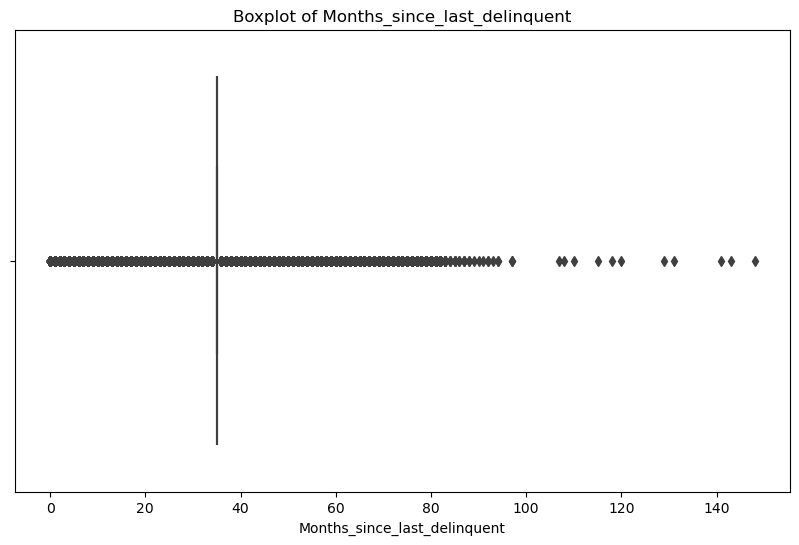

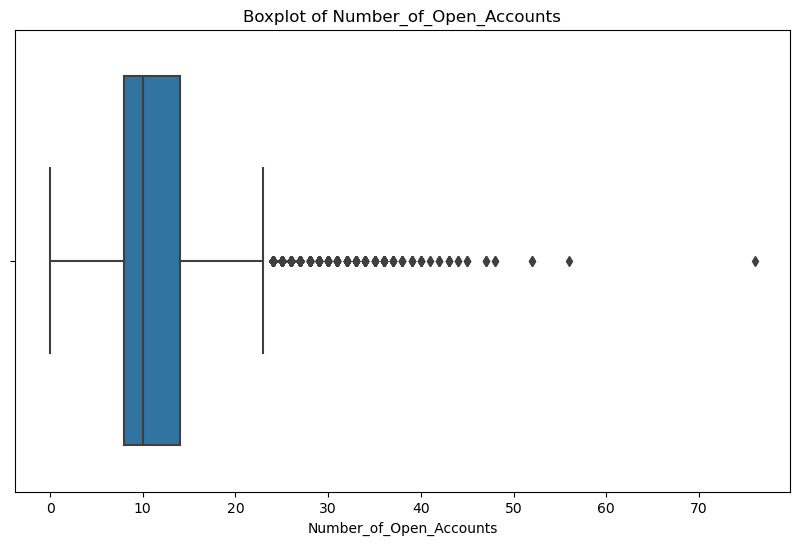

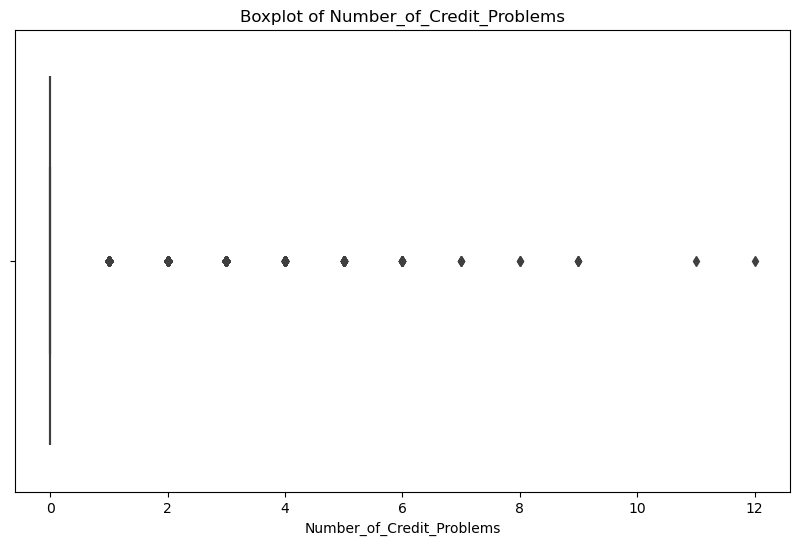

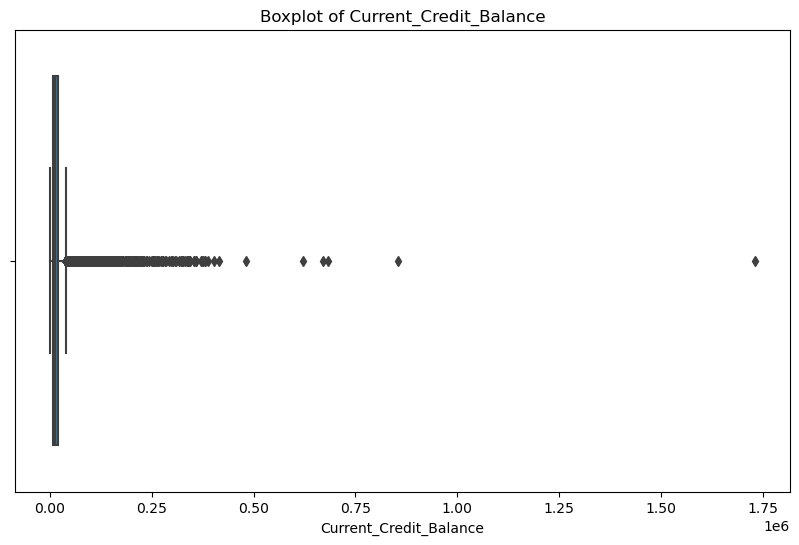

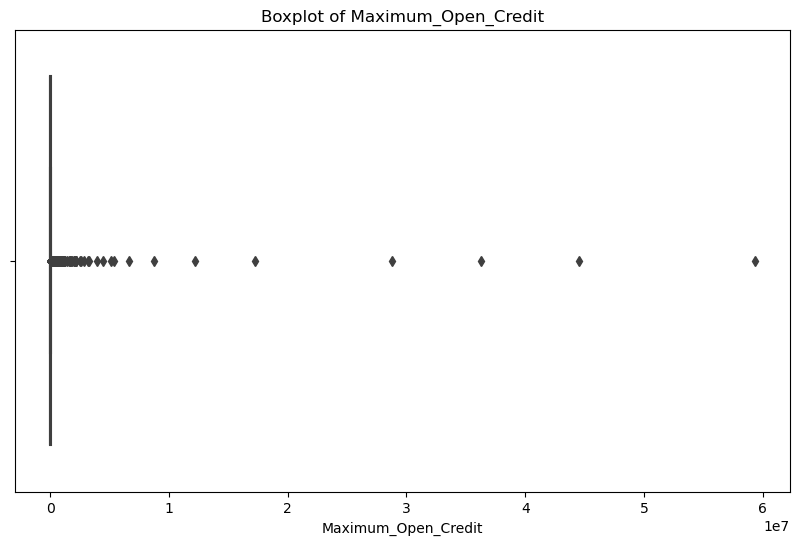

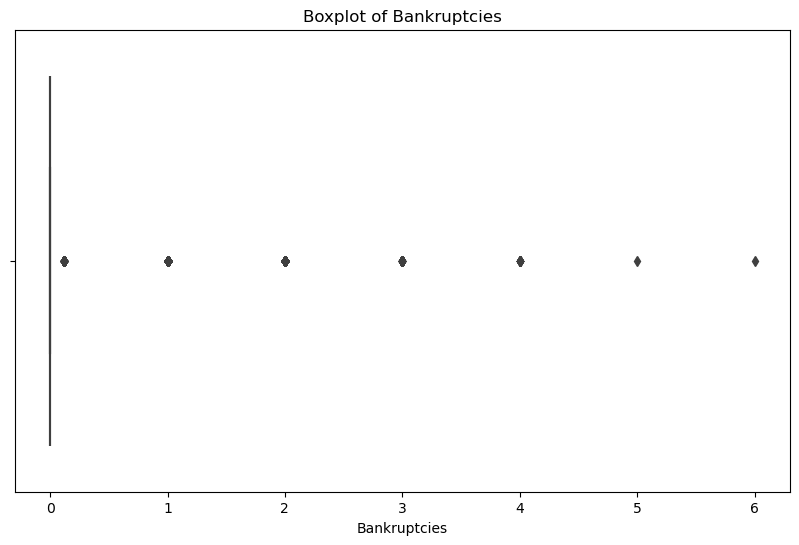

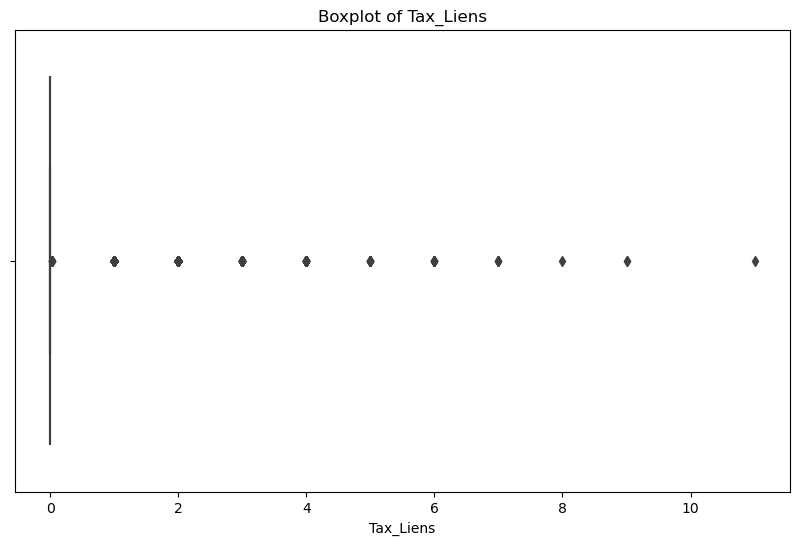

In [398]:
for column in qtyFeatures:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=X[column])
    plt.xlabel(column)
    plt.title(f'Boxplot of {column}')
    plt.show()

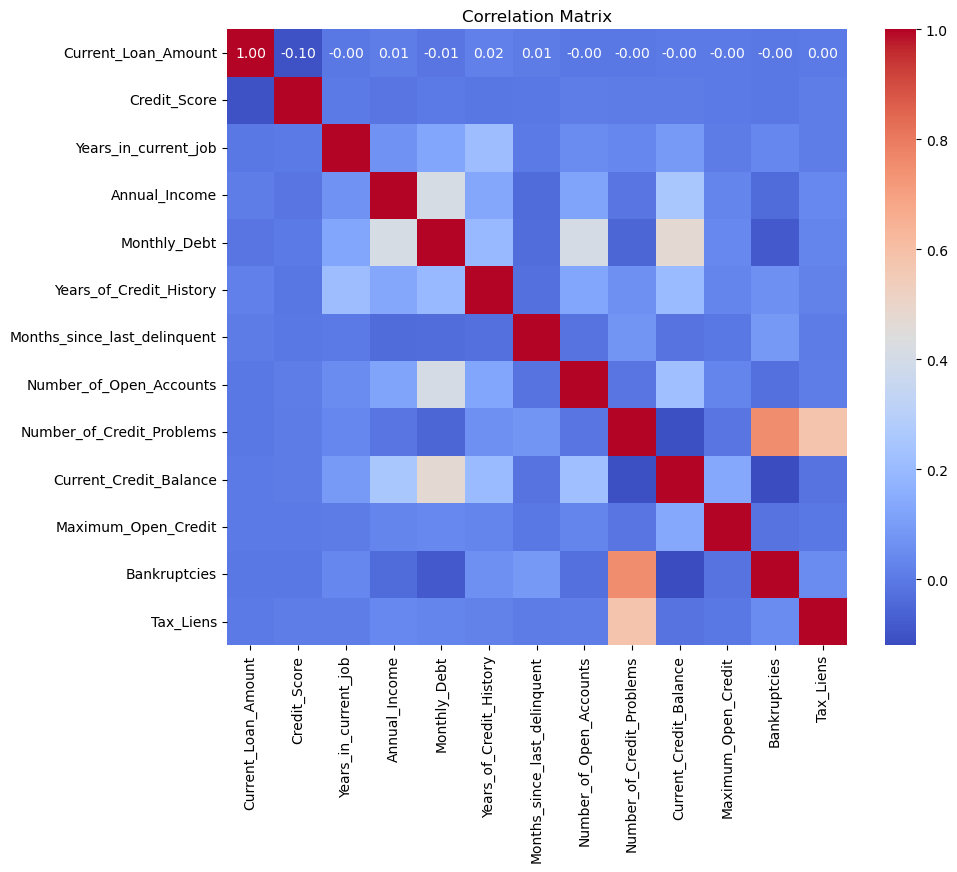

In [399]:
# Calculate the correlation matrix
corr_ = X[qtyFeatures].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [400]:
def remove_outliers(dataframe, columns, threshold=1.5):

    """
        Detect and remove outliers from the specified columns of the DataFrame.
        
        Parameters:
        df (pd.DataFrame): The input DataFrame.
        columns (list): List of columns to check for outliers.
        threshold (float): The IQR threshold to use for outlier detection (default is 1.5).
        
        Returns:
        pd.DataFrame: DataFrame with outliers removed.
    """

    for col in columns:
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - (threshold * IQR)
        upper_bound = Q3 + (threshold * IQR)

        dataframe = dataframe[(dataframe[col] >= lower_bound) & (dataframe[col] <= upper_bound)]

    return dataframe

In [401]:
# X_final = remove_outliers(X, qtyFeatures)

In [402]:
# X_final.shape

## Step 5:

## Model Building and Evaluation

In [403]:
X.shape

(62052, 30)

In [411]:
def feature_importance(model, X):

    importances = model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

    indices = np.argsort(importances)[::-1]

    print("Feature Ranking : ")
    for f in range(X.shape[1]):
        print(f"{f+1}. {X.columns[indices[f]]}: {importances[indices[f]]}")

    # Plot the important features 
    plt.figure(figsize=(15, 10))
    plt.title("Feature Importances")
    plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
    plt.show()


In [425]:
def plot_auc_curve(model, X, y):
    try:
        y_probs = model.predict_proba(X)[:,1]
    except:
        d = model.decision_function(X)
        y_probs = np.exp(d) / (1 + np.exp(d))

    auc = roc_auc_score(y, y_probs)
    fpr, tpr, threshold = roc_curve(y, y_probs)

    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Guess')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=15)
    plt.xlabel("False Positive Rate", fontsize=12)
    plt.ylabel("True Positive Rate", fontsize=12)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

In [415]:
def fitAndEvaluateModel(X, y, model_name, model_algo, params, CV):
    np.random.seed(10)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)


    print(f"{'-'*75}")
    print(f"{model_name} INFO")
    print(f"The shape of Train set  :   {X_train.shape}")
    print(f"The shape of Test set   :   {X_test.shape}")
    print(f"The shape of Train labels :   {y_train.shape}")
    print(f"The shape of Test labels  :   {y_test.shape}")
    print(f"{'-'*75}")
    print(f"{'-'*75}")
    
    print("Starting GridSearchCV...")
    GRID = GridSearchCV(
        estimator=model_algo,
        param_grid=params,
        cv=CV,
        scoring='accuracy',
        verbose=2,
        n_jobs=-1
    )

    print(f"{'-'*75}")
    print("Fitting the model to the training data...")
    GRID.fit(X_train, y_train)

    best_params = GRID.best_params_
    best_score = GRID.best_score_

    print(f"{'-'*75}")
    print(f"GridSearchCV completed.")
    print(f"Best Parameters: {best_params}")
    print(f"Best Cross-Validation Accuracy Score: {best_score}")

    print(f"{'-'*75}")
    print("Predicting on the test data...")
    y_pred = GRID.predict(X_test)
  
    print(f"{'-'*75}")
    print("Evaluation Metrics:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"AUC: {roc_auc_score(y_test, y_pred)}")
    print(f"Log Loss: {log_loss(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")

    print(f"{'-'*75}")
    print(f"End of {model_name} INFO")
    print(f"{'-'*75}")
    print(f"{'-'*75}")



In [428]:
def print_evaluation_results(X_train, X_test, y_train, y_test, model):

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    print(f"{'-'*75}")
    print("Evaluation Metrics Training :")
    print(f"Accuracy: {accuracy_score(y_train, y_pred_train)}")
    print(f"AUC: {roc_auc_score(y_train, y_pred_train)}")
    print(f"Log Loss: {log_loss(y_train, y_pred_train)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_train, y_pred_train)}")
    print(f"Recall: {recall_score(y_train, y_pred_train)}")
    print(f"Precision: {precision_score(y_train, y_pred_train)}")
    print(f"{'-'*75}")
    print(f"{'-'*75}")
    print("Evaluation Metrics Testing :")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_test)}")
    print(f"AUC: {roc_auc_score(y_test, y_pred_test)}")
    print(f"Log Loss: {log_loss(y_test, y_pred_test)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_test)}")
    print(f"Recall: {recall_score(y_test, y_pred_test)}")
    print(f"Precision: {precision_score(y_test, y_pred_test)}")
    print(f"{'-'*75}")

In [418]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)

> ### Logistic Regression

In [416]:
model_algo = LogisticRegression()
model_name = 'LogisticRegression'
params = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200, 300]
}
CV = 5

fitAndEvaluateModel(X, y, model_name, model_algo, params, CV)

---------------------------------------------------------------------------
LogisticRegression INFO
The shape of Train set  :   (40333, 30)
The shape of Test set   :   (21719, 30)
The shape of Train labels :   (40333,)
The shape of Test labels  :   (21719,)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Starting GridSearchCV...
---------------------------------------------------------------------------
Fitting the model to the training data...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
---------------------------------------------------------------------------
GridSearchCV completed.
Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2'}
Best Cross-Validation Accuracy Score: 0.7933454356707774
---------------------------------------------------------------------------
Predicting on the test data...
-----------------------------------------------------------

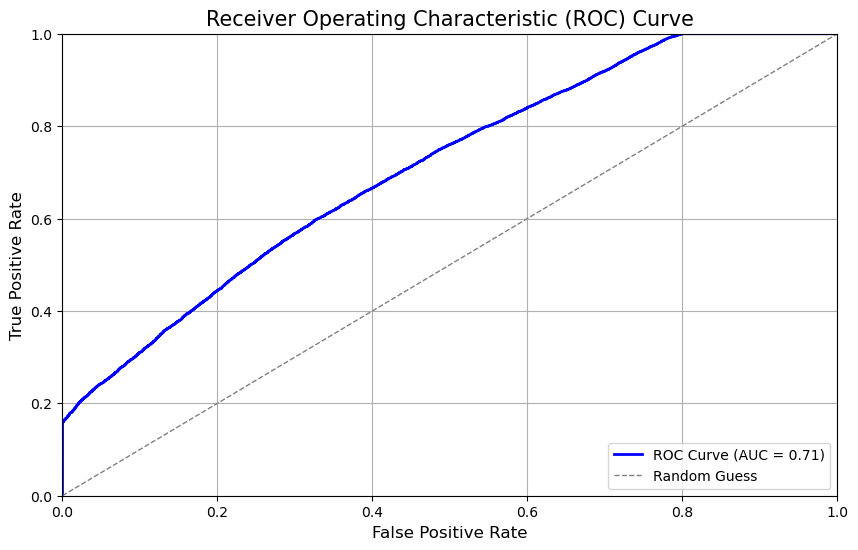

---------------------------------------------------------------------------
Evaluation Metrics Training :
Accuracy: 0.7933701931420921
AUC: 0.6008673852645998
Log Loss: 7.447693138246656
Confusion Matrix:
[[ 2114  8291]
 [   43 29885]]
Recall: 0.9985632183908046
Precision: 0.7828216680637049
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Evaluation Metrics Testing :
Accuracy: 0.7876974077996225
AUC: 0.600890155066812
Log Loss: 7.652161046881496
Confusion Matrix:
[[ 1169  4594]
 [   17 15939]]
Recall: 0.9989345700676862
Precision: 0.7762626016656115
---------------------------------------------------------------------------


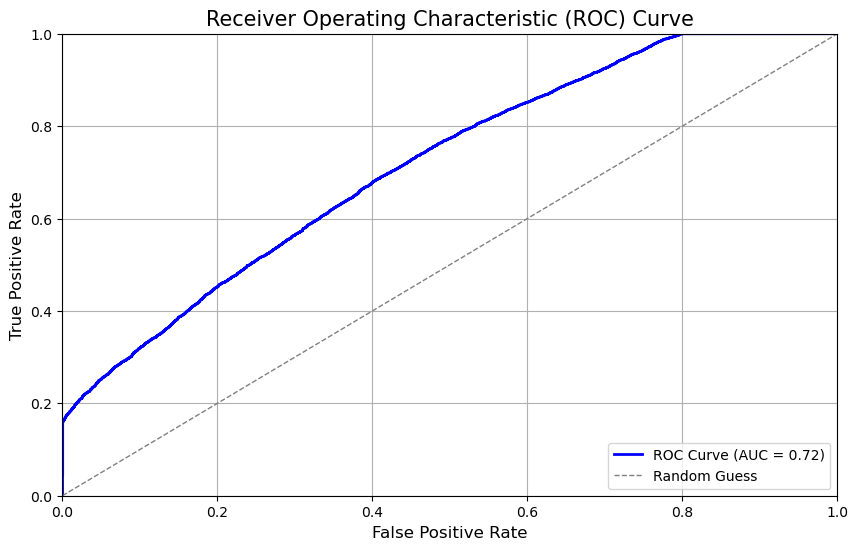

In [430]:
LR = LogisticRegression(
    penalty='l2',
    C=0.1,
    max_iter=100
)

LR.fit(X_train, y_train)

# feature_importance(LR, X)

plot_auc_curve(LR, X_train, y_train)
print_evaluation_results(X_train, X_test, y_train, y_test, LR)
plot_auc_curve(LR, X_test, y_test)

> ### Random Forest

In [431]:
model_algo = RandomForestClassifier()
model_name = 'RandomForest'
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
CV = 5

fitAndEvaluateModel(X, y, model_name, model_algo, param_grid, CV)

---------------------------------------------------------------------------
RandomForest INFO
The shape of Train set  :   (40333, 30)
The shape of Test set   :   (21719, 30)
The shape of Train labels :   (40333,)
The shape of Test labels  :   (21719,)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Starting GridSearchCV...
---------------------------------------------------------------------------
Fitting the model to the training data...
Fitting 5 folds for each of 675 candidates, totalling 3375 fits


> ### 